In [1]:

%matplotlib inline
from matplotlib import pyplot
import geopandas
from shapely.geometry import Polygon
import numpy as np

from tile_units import TileUnit
from tile_map import Tiling

In [2]:
ak = geopandas.read_file("../data/imd-auckland-2018.gpkg")

# Octagons

In [3]:
d = 100
s2 = np.sqrt(2)
unit = TileUnit(spacing = d, crs = 2193)
octagon = Polygon(
    [(d*s2, 0), (0, d*s2), 
     (-d*s2, 0), (0, -d*s2)]).intersection(unit.tile.geometry[0])
holes = unit.tile.geometry.difference(octagon).explode(index_parts = True)

unit.elements = geopandas.GeoDataFrame(
    data = {"element_id": list("abbbb")}, crs = 2193,
    geometry = geopandas.GeoSeries([octagon] + list(holes))
)

In [4]:
tiling = Tiling(unit, ak, id_var = "DZ2018")
t = tiling.get_tiled_map()

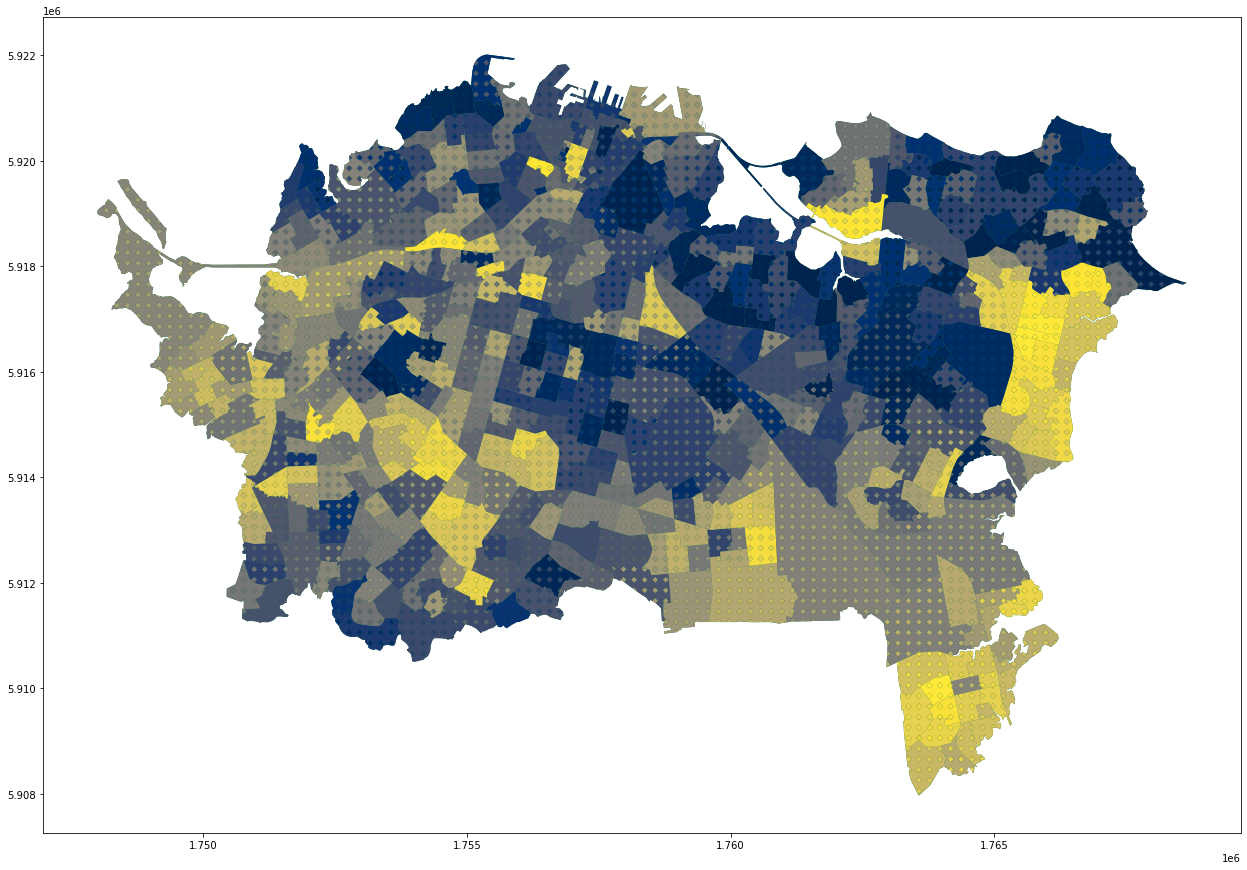

In [5]:
fig = pyplot.figure(figsize = (24, 15))
ax = fig.add_subplot(111)
ak.plot(ax = ax, facecolor = "#006633", linewidth = 0)

strands = set(t.element_id)
cols = [x for x in t.columns if "Rank" in x]
cmaps = ("cividis", "cividis")

for strand, col, cmap in zip(strands, cols, cmaps):
    t[t.element_id == strand].plot(ax = ax, column = col, cmap = cmap, k = 100, scheme = "equal_interval", linewidth = 0)

Again, this seems to have potential for showing contrast in two variables.